<h1>Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE 


<h1>Loading the dataset

Loading the dataset using pandas and dropping duplicates:

In [12]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df = df.drop_duplicates()

Dataset's info

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

<h1>Exploratory Analysis

The first five rows of our dataset

In [5]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Calculating the mean, std, and etc. for our dataset

In [7]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Dataset's columns

In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Distribution of each column in the dataset

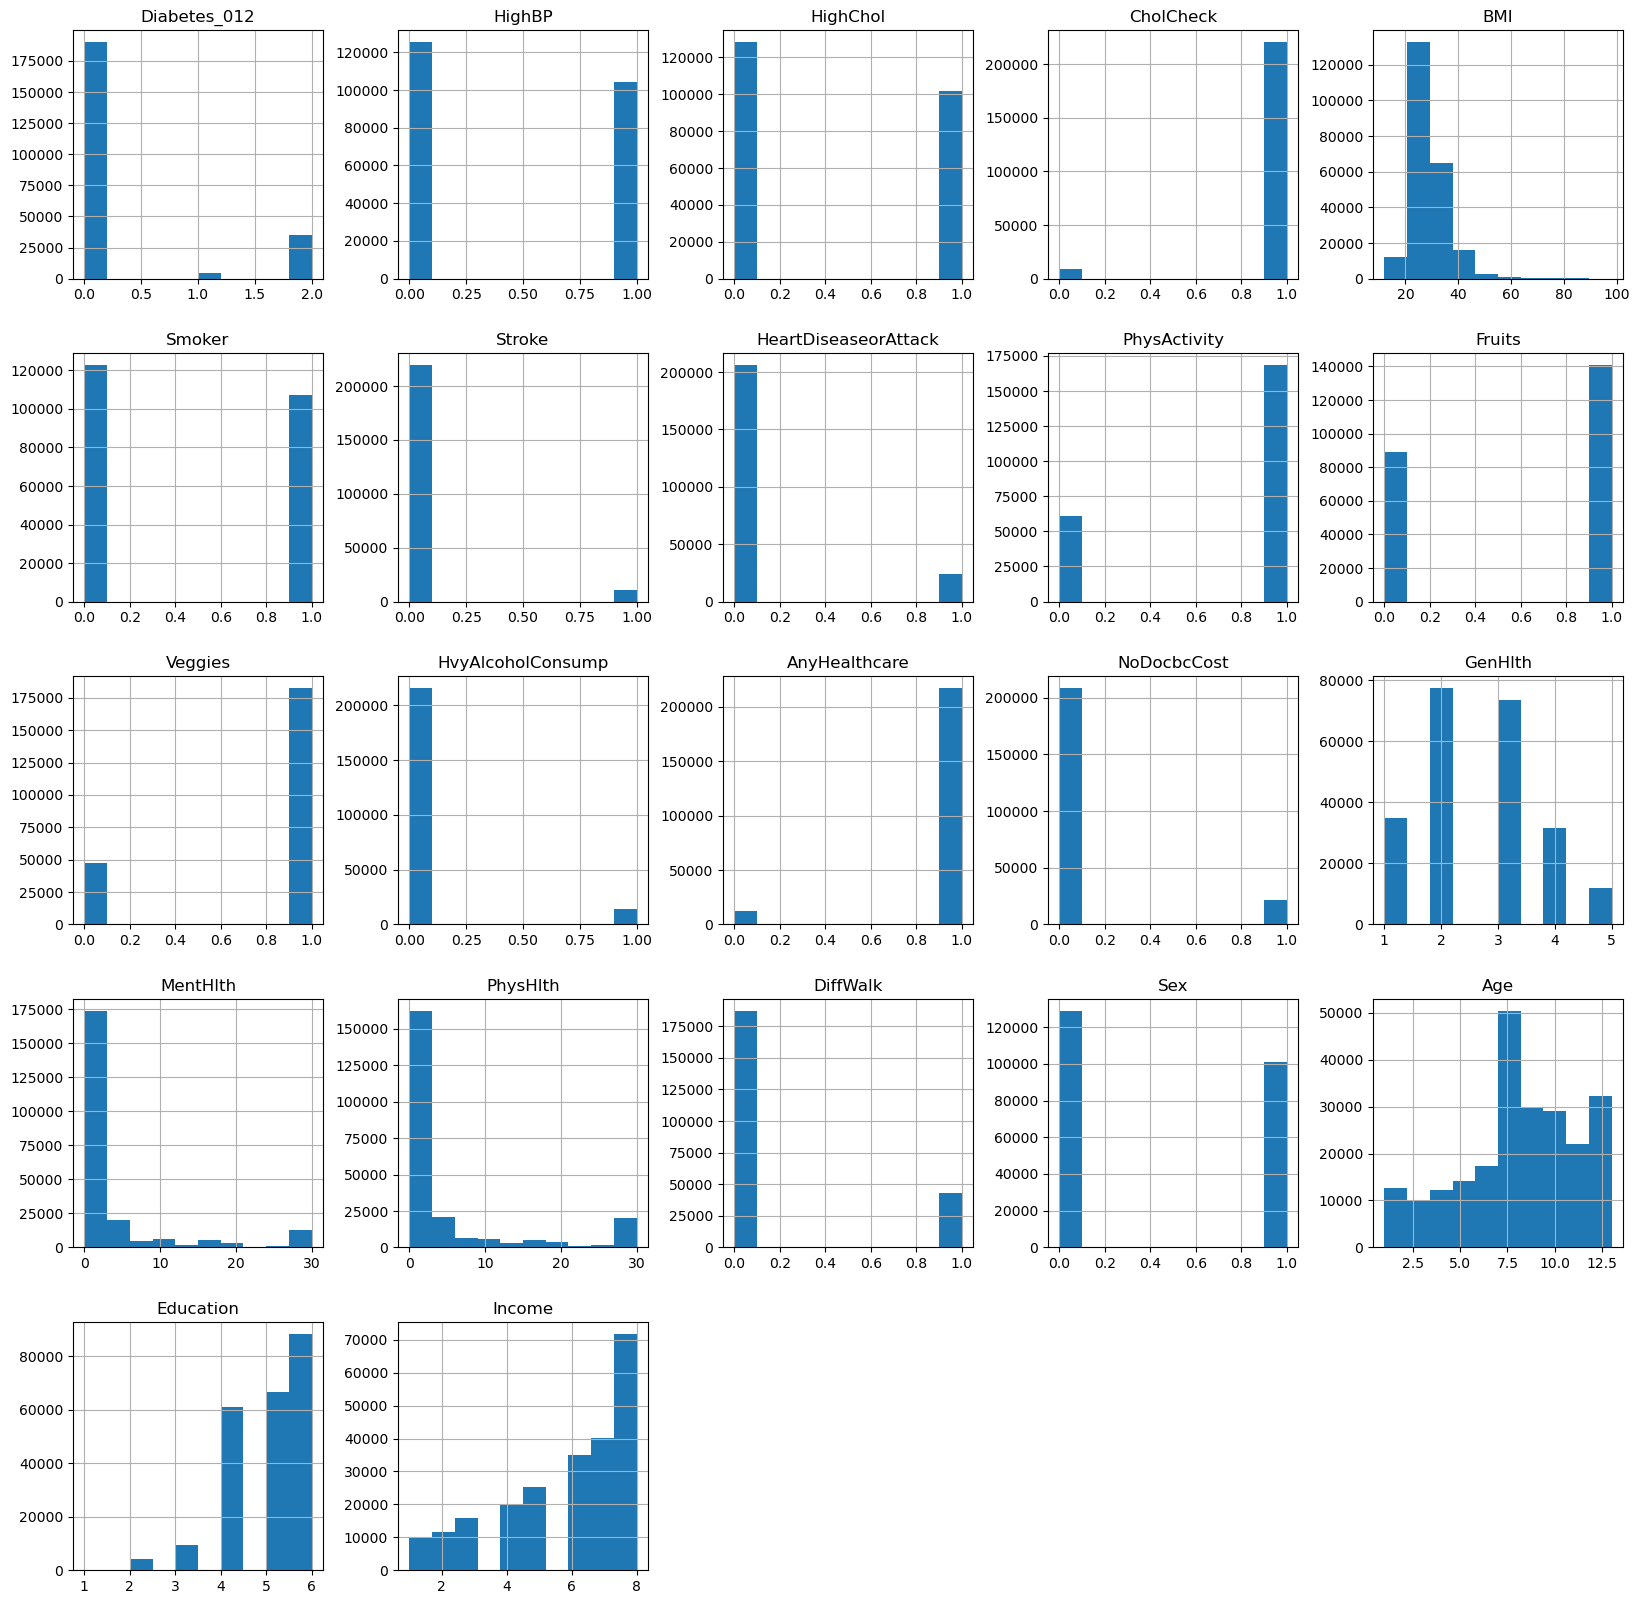

In [7]:
df.hist(figsize=(20,20))
plt.show()

The correlation of 'Diabetes_012' column with other columns

In [22]:
df.corr()[['Diabetes_012']]

,Diabetes_012
Diabetes_012,1.000000
HighBP,0.261976
HighChol,0.203327
CholCheck,0.075701
BMI,0.212027
Smoker,0.046774
Stroke,0.100276
HeartDiseaseorAttack,0.170816
PhysActivity,-0.103408
Fruits,-0.025462


Plotting correlation

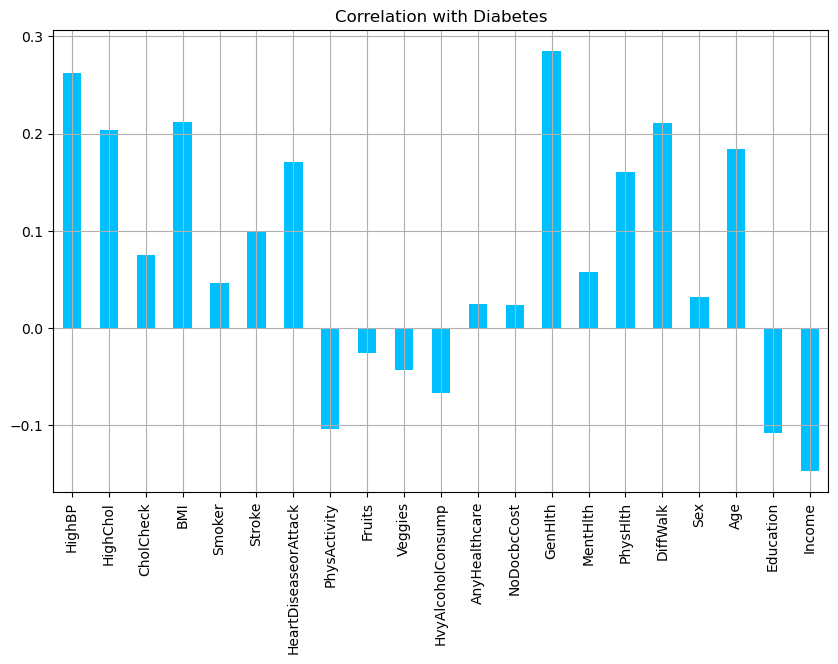

In [13]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue")
plt.show()

Finding columns with high correlation to Diabetes in individuals over this dataset:

In [8]:
diab_corr = df.corr()['Diabetes_012']
high_corr = diab_corr[diab_corr > 0.2].keys()

print("High correlation columns:", str(high_corr[1:].values))

High correlation columns: ['HighBP' 'HighChol' 'BMI' 'GenHlth' 'DiffWalk']


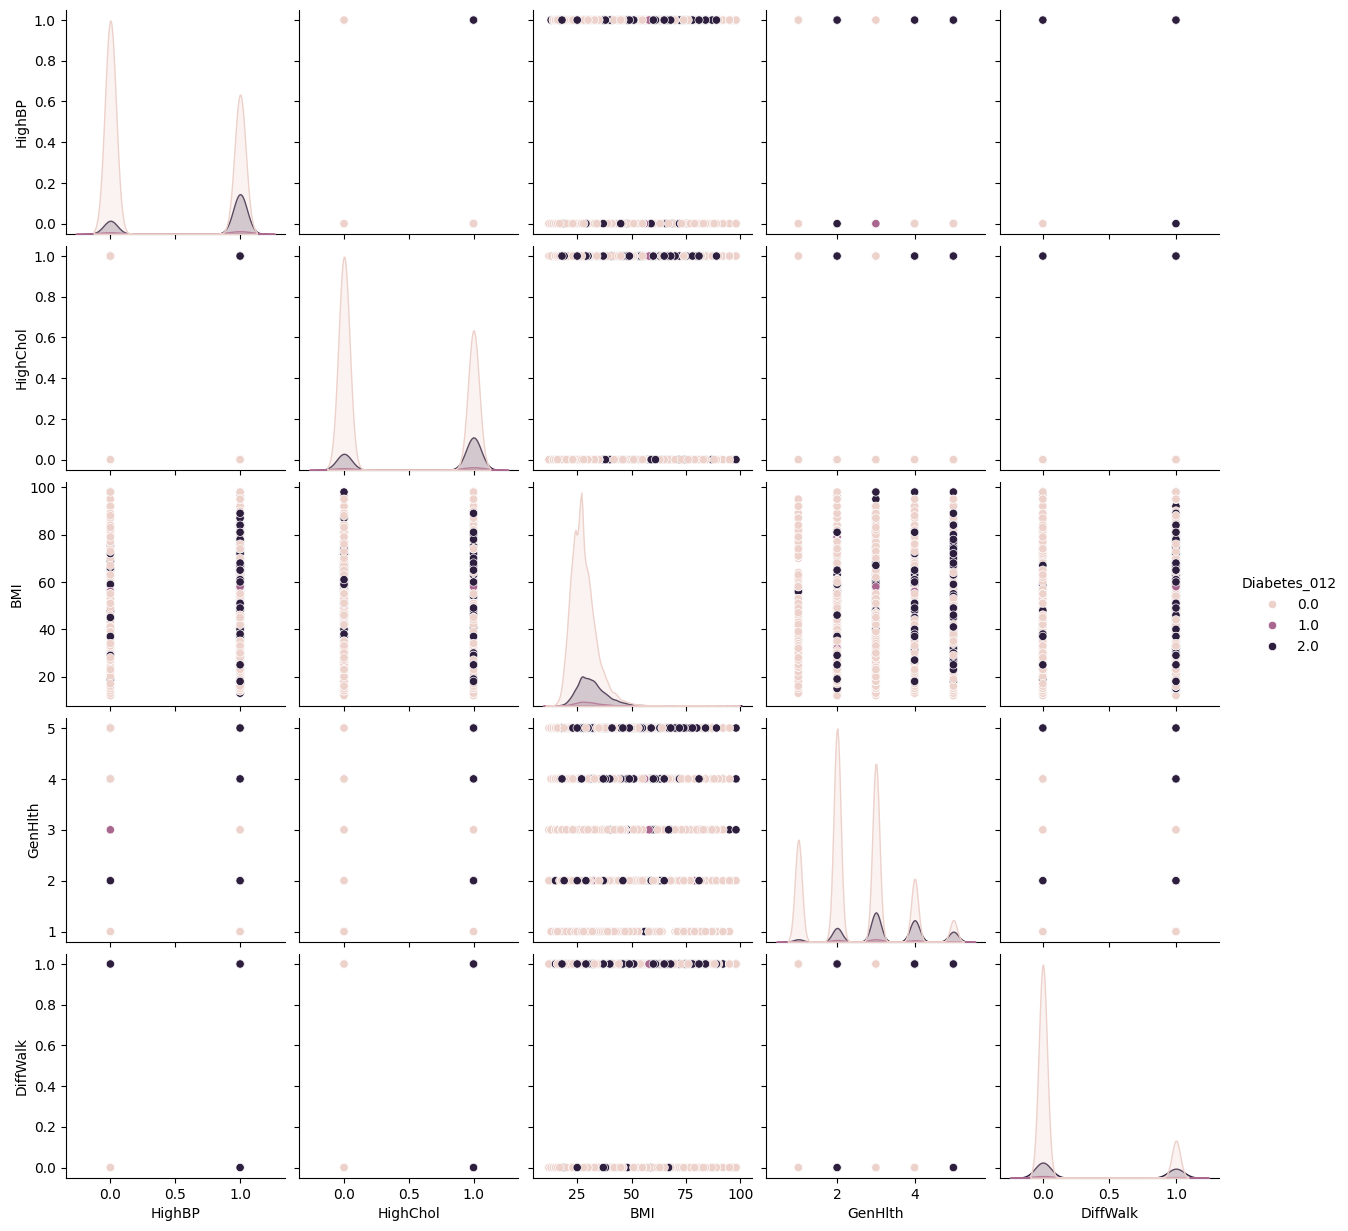

In [35]:
selected_columns = high_corr[1:]

sns.pairplot(df, x_vars = selected_columns, y_vars = selected_columns, hue='Diabetes_012', height=2.5)
plt.show()

How many samples does each category of 'Diabetes_012' column have?

In [7]:
df_class_0 = df[df['Diabetes_012'] == 0]

df_class_1 = df[df['Diabetes_012'] == 1]

df_class_2 = df[df['Diabetes_012'] == 2]


count_class_0, count_class_1, count_class_2=df.Diabetes_012.value_counts().sort_index()

print(count_class_0,count_class_1,count_class_2)

190055 4629 35097


Which gender has the most number of diabetes samples?

In [48]:
df_class_2.groupby('Sex')[['Diabetes_012']].count()

,Diabetes_012
Sex,
0.0,18345
1.0,16752


<h1>Spliting dataset into train,val,test split

In [28]:
y = df.iloc[:,[0]]
x= df.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)



Predicting 'Diabetes_012' using knn algorithm. Explanation: .values will give the values in a numpy array (shape: (n,1))

.ravel will convert that array shape to (n, ) (i.e. flatten it)

In [24]:
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_val)
    print('k = '+str(i),'\n-------------------------------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_i,zero_division=0),'\n-------------------------------------------------------------------------------------------------------------------------------')



k = 1 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     30227
         1.0       0.03      0.03      0.03       756
         2.0       0.30      0.29      0.29      5782

    accuracy                           0.75     36765
   macro avg       0.39      0.39      0.39     36765
weighted avg       0.75      0.75      0.75     36765
 
-------------------------------------------------------------------------------------------------------------------------------
k = 2 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89     30227
         1.0       0.04      0.02      0.03       756
         2.0       0.40      0.11      0.17      5782

  

<h1> How to handle this imbalance dataset?

As it can be seen, since our dataset is imbalance, it is not possible to get a good prediction for values 1 and 2 in the 'Diabetes_012' column, even though the accuracy is above eighty percent, so it is necessary to control the imbalance of the dataset.

**Method 1: Under Sampling**
It's not a good idea to undersample data since we will lose a lot of rows in our dataset. Instead we will use other methods.

**Method 2: Over Sampling**
We will create copies from our catagories with few rows.

In [21]:
df_over_sampled = pd.concat([df_class_0,df_class_1.sample(count_class_0,replace=True),df_class_2.sample(count_class_0,replace=True)])

df_over_sampled.Diabetes_012.value_counts()

Diabetes_012
0.0    190055
1.0    190055
2.0    190055
Name: count, dtype: int64

**Method 3:** SMOTE (Best Method for models)<br>
**for the best knn results use over sampling without dropping duplicates in dataset and use standardization**

In [40]:
sm_x,sm_y = SMOTE(random_state=1234).fit_resample(x,y)

df_over_sampled = pd.concat([sm_y,sm_x],axis=1)

df_over_sampled.Diabetes_012.value_counts()

Diabetes_012
0.0    190055
2.0    190055
1.0    190055
Name: count, dtype: int64

<h1> Normalization or Standardization?

Now we use our classification algorithm again:
<br>**Since our dataset is not normalized, we also test if normalizing will improve our results**

In [41]:
y = df_over_sampled.iloc[:,[0]]
x= df_over_sampled.iloc[:,1:]

#normalize data
x= pd.DataFrame(normalize(x,axis=0),columns=x.columns)


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)

print('Train size = ', x_train.shape[0])
print('Validation size = ', x_val.shape[0])
print('Test size = ', x_test.shape[0])


Train size =  364905
Validation size =  91227
Test size =  114033


In [42]:
for i in range(1,3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_val)
    print('k = '+str(i),'\n-------------------------------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_i,zero_division=0),'\n-------------------------------------------------------------------------------------------------------------------------------')



k = 1 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87     30626
         1.0       0.94      0.99      0.97     30209
         2.0       0.85      0.90      0.87     30392

    accuracy                           0.90     91227
   macro avg       0.90      0.90      0.90     91227
weighted avg       0.90      0.90      0.90     91227
 
-------------------------------------------------------------------------------------------------------------------------------
k = 2 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     30626
         1.0       0.91      0.99      0.95     30209
         2.0       0.88      0.75      0.81     30392

  

**Normalization by rows:**

In [38]:
y = df_over_sampled.iloc[:,[0]]
x= df_over_sampled.iloc[:,1:]

#normalize data
x= pd.DataFrame(normalize(x,axis=1),columns=x.columns)


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)


In [29]:
for i in range(1,3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_val)
    print('k = '+str(i),'\n-------------------------------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_i,zero_division=0),'\n-------------------------------------------------------------------------------------------------------------------------------')



k = 1 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87     30575
         1.0       0.97      1.00      0.98     30374
         2.0       0.84      0.97      0.90     30278

    accuracy                           0.92     91227
   macro avg       0.93      0.92      0.92     91227
weighted avg       0.93      0.92      0.92     91227
 
-------------------------------------------------------------------------------------------------------------------------------
k = 2 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85     30575
         1.0       0.96      1.00      0.98     30374
         2.0       0.84      0.90      0.87     30278

  

    Standardization of data (Best method for our case):

In [43]:
y = df_over_sampled.iloc[:,[0]]
x= df_over_sampled.iloc[:,1:]

x = pd.DataFrame(StandardScaler().fit_transform(x,),columns=x.columns)


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)


In [44]:
for i in range(1,3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_val)
    print('k = '+str(i),'\n-------------------------------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_i,zero_division=0),'\n-------------------------------------------------------------------------------------------------------------------------------')



k = 1 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87     30626
         1.0       0.94      0.99      0.97     30209
         2.0       0.85      0.90      0.87     30392

    accuracy                           0.90     91227
   macro avg       0.90      0.90      0.90     91227
weighted avg       0.90      0.90      0.90     91227
 
-------------------------------------------------------------------------------------------------------------------------------
k = 2 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     30626
         1.0       0.91      0.99      0.95     30209
         2.0       0.88      0.75      0.81     30392

  

**Without normalization and standardization:**

In [56]:
y = df_over_sampled.iloc[:,[0]]
x= df_over_sampled.iloc[:,1:]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)



In [57]:
for i in range(1,3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_val)
    print('k = '+str(i),'\n-------------------------------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_i,zero_division=0),'\n-------------------------------------------------------------------------------------------------------------------------------')



k = 1 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     30575
         1.0       0.94      1.00      0.97     30374
         2.0       0.82      0.97      0.89     30278

    accuracy                           0.90     91227
   macro avg       0.91      0.90      0.90     91227
weighted avg       0.91      0.90      0.90     91227
 
-------------------------------------------------------------------------------------------------------------------------------
k = 2 
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     30575
         1.0       0.94      1.00      0.97     30374
         2.0       0.85      0.90      0.88     30278

  

<h1> Models:

**Logistic Regression**

In [46]:
lr = LogisticRegression(random_state=1234,max_iter=1000)

lr.fit(x_train,y_train.values.ravel())

lr_pred = lr.predict(x_val)

print(classification_report(y_val, lr_pred,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61     30626
         1.0       0.44      0.33      0.38     30209
         2.0       0.51      0.60      0.55     30392

    accuracy                           0.52     91227
   macro avg       0.51      0.52      0.51     91227
weighted avg       0.52      0.52      0.51     91227



In [47]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
lr.coef_

array([[-3.54695781e-01, -3.92866448e-01, -7.44200436e-01,
        -4.49466660e-02,  3.80982328e-02, -2.05957211e-02,
        -6.23209297e-02,  1.28872331e-02,  1.09041759e-03,
         5.67147887e-03,  3.62126458e-01, -2.65939983e-02,
        -1.68567034e-01, -2.86861178e-01, -7.88751732e-04,
         3.79222562e-03, -1.86316894e-02, -1.24182941e-01,
        -9.97923672e-02,  2.31929862e-02,  3.96582741e-02],
       [-1.11405744e-02,  1.76603113e-01,  1.72122144e-01,
         1.41237781e-02, -2.37911375e-02, -1.17123390e-01,
        -9.60800742e-02,  1.74672916e-02,  1.71177989e-02,
        -1.46890500e-02,  8.97061772e-02, -7.64936211e-02,
         2.20230232e-01,  1.25208112e-02,  5.18803209e-03,
        -7.04194560e-04, -5.10911116e-02, -2.30429911e-02,
         4.24989245e-02, -2.76997703e-02, -1.98233466e-02],
       [ 3.65836356e-01,  2.16263335e-01,  5.72078292e-01,
         3.08228879e-02, -1.43070953e-02,  1.37719111e-01,
         1.58401004e-01, -3.03545247e-02, -1.82082165e

**Artificial Neural Networks**

In [44]:
nn = MLPClassifier(hidden_layer_sizes = (10,15),
                   activation = 'relu',
                   solver = 'adam',
                   early_stopping=True,
                   random_state=1234)

nn.fit(x_train, y_train.values.ravel())

y_pred = nn.predict(x_test)


print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77     37906
         1.0       0.63      0.55      0.59     38257
         2.0       0.54      0.51      0.53     37870

    accuracy                           0.63    114033
   macro avg       0.63      0.64      0.63    114033
weighted avg       0.63      0.63      0.63    114033



In [45]:
nn.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 15),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [46]:
nn.coefs_

[array([[-3.80324914e-02,  3.22685879e-02, -7.94263509e-02,
         -3.56861043e-02, -1.88468026e-02, -3.16466732e-01,
         -2.05611030e-02,  8.93144527e-03,  5.95361813e-02,
         -1.09088643e-01],
        [-6.89808392e-02,  3.13126691e-02,  1.45789143e-02,
         -3.63555024e-02, -5.86249990e-03, -1.51133739e-01,
         -1.05529978e-02,  8.71475418e-04,  1.87170153e-02,
         -5.37634952e-02],
        [-4.73856821e-01, -2.76933460e+00, -4.26834446e+00,
         -3.22290481e-01,  7.77562363e+00,  9.95561075e-03,
         -1.12981843e+00,  2.15967163e-02,  1.63905247e-01,
         -6.83096841e-01],
        [ 5.87863698e-02,  2.35047460e-01, -2.10517962e-01,
         -4.59298739e-03, -4.39815947e-03,  2.17100851e-02,
         -1.95330549e-01,  1.87215442e-02,  2.65380521e-01,
         -1.54273335e-01],
        [-6.39588127e-03, -1.04063453e-02, -3.09714606e-02,
         -7.40796529e-04, -2.03353836e-03, -1.64773616e-02,
         -1.66161096e-02, -1.48471460e-02,  1.061645